In [1]:
import pandas as pd#'Pandas' is used for data manipulation and analysis
import numpy as np#'Numpy' is used for mathematical operations on Large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt# 'Matplotlib' is a data visualization library for 20 and 30 plots, built on numpy 
import datetime as dt# 'datetime' is used to perform date and time operations 
from sklearn.preprocessing import StandardScaler# 'StandardScalar' from sklearn.preprocessing library is used to scale the data 
from numpy.linalg import eig# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from sklearn.decomposition import PCA# 'PCA' function to perform principal component analysis using the sklearn library 
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\archive (2)\Customer Data.csv") #importing the dataset

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.shape#it will define the shape of the data

(8950, 18)

In [5]:
data.size#it will define the size of the data

161100

In [6]:
data.info()#information about the models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
data.isna()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

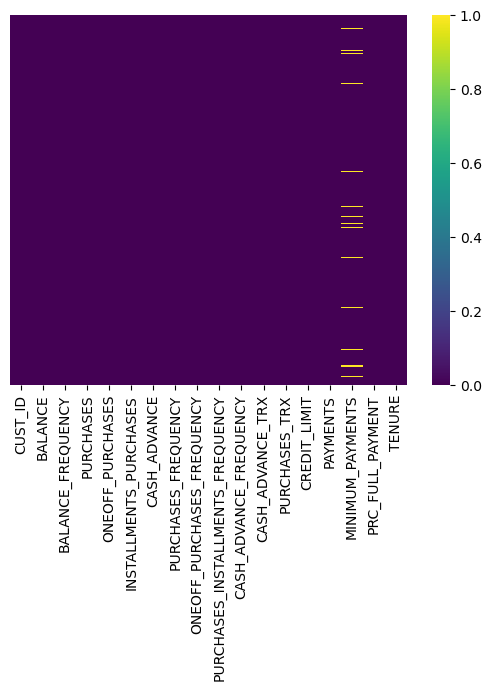

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [14]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [15]:
num_data=data.select_dtypes(exclude=object)

In [16]:
num_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [17]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [18]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: xlabel='BALANCE', ylabel='Density'>

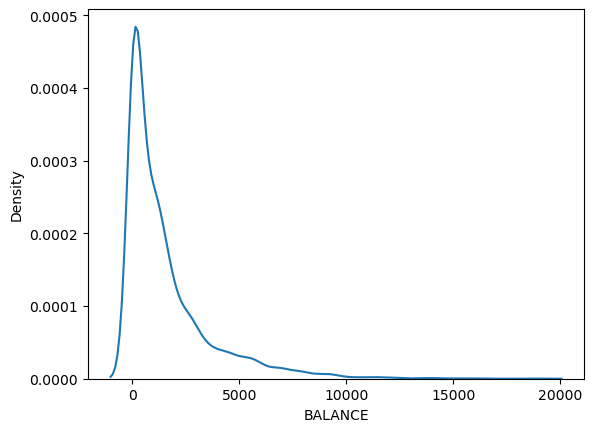

In [19]:
sns.kdeplot(x='BALANCE',data=data)

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

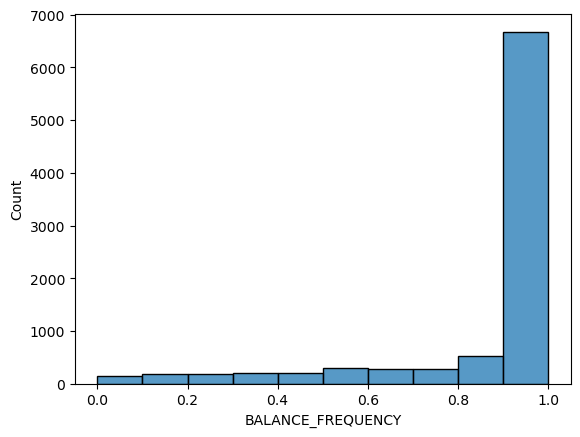

In [20]:
sns.histplot(x='BALANCE_FREQUENCY',bins=10,data=data)

<Axes: xlabel='CASH_ADVANCE'>

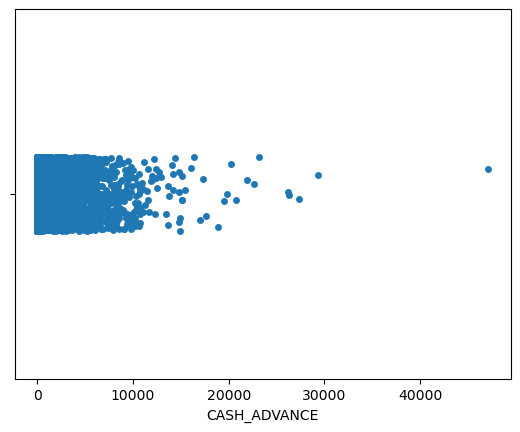

In [21]:
sns.stripplot(x='CASH_ADVANCE',data=data)

In [22]:
a=data.groupby("TENURE")["TENURE"].count()

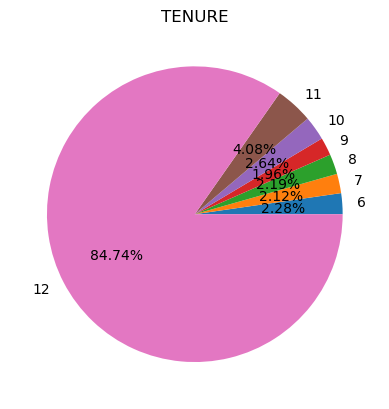

In [23]:
plt.pie(a,labels=a.index,autopct="%.2f%%")
plt.title("TENURE")
plt.show()

<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

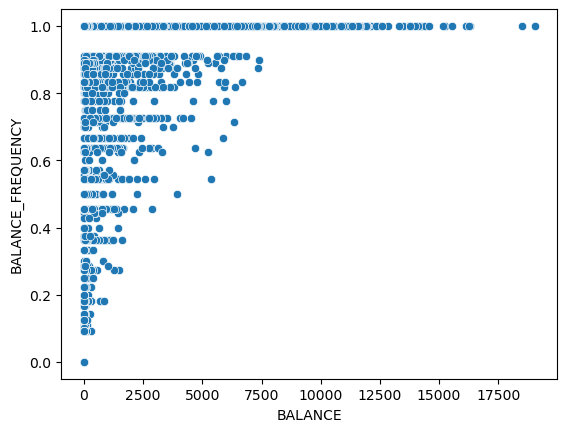

In [24]:
sns.scatterplot(x='BALANCE',y='BALANCE_FREQUENCY',data=data)

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

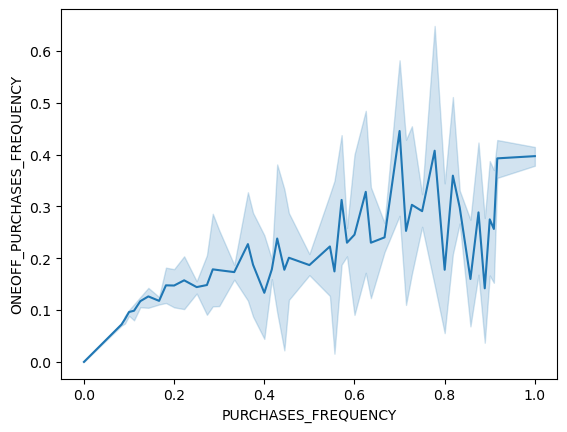

In [25]:
sns.lineplot(x='PURCHASES_FREQUENCY',y='ONEOFF_PURCHASES_FREQUENCY',data=data)

In [26]:
from scipy.stats import zscore
z_scores = zscore(data['BALANCE'])
z_score_outliers=(z_scores<-3)|(z_scores>3)
z_score_outlier_rows=data[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:      CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
30    C10031  12136.219960                1.0    3038.01           1013.20   
87    C10092   8181.251131                1.0    2258.01           1318.78   
90    C10095   9381.255094                1.0    5100.07           1147.83   
120   C10125   8504.876253                1.0    6724.26           4100.08   
124   C10130  14224.115410                1.0       0.00              0.00   
...      ...           ...                ...        ...               ...   
6838  C17026   9321.555794                1.0     334.90              0.00   
7132  C17325   9024.812044                1.0       0.00              0.00   
7427  C17630   9220.534572                1.0    1420.31            777.66   
7764  C17975  10856.483010                1.0      45.65             45.65   
7962  C18177  13318.659120                1.0    3504.74           3266.29   

      INSTALLMENTS_PURCHASES  CAS

In [27]:
x=(z_scores>-3)&(z_scores<3)
df=data[x]
print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [34]:
dff=df.drop(['PURCHASES_FREQUENCY'],axis=1)


In [35]:
dff

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [37]:
from sklearn.preprocessing import StandardScaler

In [44]:
cat_data=data.select_dtypes(include=object)
num_data=data.select_dtypes(exclude=object)

In [45]:
cat_data

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


In [46]:
num_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()
df['CUST_ID'] = encoder.fit_transform(df['CUST_ID'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_3184\4013709681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CUST_ID'] = encoder.fit_transform(df['CUST_ID'])


In [67]:
# select the numerical variables and store it as 'df_numeric_features'
df_numeric_features = data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop target variable from 'df_numeric_features' 
# use 'drop' function to drop the entire column
df_num = df_numeric_features.drop('PURCHASES_FREQUENCY',axis=1)       

# head() to display top five rows
df_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [53]:
from sklearn.cluster import KMeans

In [55]:
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.3024     -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.09749953  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.0932934  -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.32687479  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.33830497  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.3243581  -0.52555097
  -4.12276757]]


In [56]:
# 'shape' function gives the total number of rows and columns in the scaled data
print(df_num_std.shape)

(8950, 16)


In [57]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.00011174  0.32244833  0.181281    0.16436802  0.12648316  0.49674704
   0.07317426 -0.06319282  0.44926823  0.38519531  0.15435561  0.53135553
   0.32283773  0.39796451 -0.31899484  0.07270039]
 [ 0.32244833  1.00011174  0.13368937  0.10433488  0.12430607  0.0993991
   0.20243794  0.17609907  0.19189412  0.14157068  0.18964713  0.095942
   0.06501513  0.13119544 -0.09509307  0.11978927]
 [ 0.181281    0.13368937  1.00011174  0.91694701  0.67997219 -0.05147997
   0.49848543  0.31560195 -0.12015662 -0.06718279  0.68963789  0.35701681
   0.60333124  0.09579955  0.18039922  0.08629784]
 [ 0.16436802  0.10433488  0.91694701  1.00011174  0.33065849 -0.0313292
   0.52494974  0.12774338 -0.08263698 -0.04621732  0.54558424  0.3197705
   0.56735501  0.05026187  0.1327776   0.06415719]
 [ 0.12648316  0.12430607  0.67997219  0.33065849  1.00011174 -0.06425086
   0.21406635  0.51140797 -0.13233318 -0.07400745  0.62817773  0.2565432
   0.38412671  0.13403371  0.18258976  0.0861525 ]]


In [58]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.26797320e+00 3.30203384e+00 1.36251770e+00 1.17281497e+00
 1.03682451e+00 9.71709066e-01 8.05929258e-01 7.28977837e-01
 6.11158737e-01 1.16524824e-05 4.64953702e-01 3.88813547e-01
 2.88420417e-01 1.71940189e-01 2.20959238e-01 2.06750047e-01] 

Eigenvectors: 
 
 [[-1.81848292e-01  3.79265592e-01 -2.70409795e-01 -1.65496196e-01
   9.90733777e-02  7.69147190e-02 -2.31757755e-01  1.93472395e-01
   8.75153960e-02  4.33531908e-05 -8.37562423e-02  1.48237283e-01
  -5.96865937e-01 -2.08954786e-01 -3.72319579e-01  2.01301923e-01]
 [-1.34044701e-01  1.20551480e-01 -4.44199126e-01  4.28019744e-02
  -5.81883260e-01 -9.63844321e-02 -1.14306587e-01 -2.09689115e-01
   5.49715139e-01  2.34227490e-06  4.71322391e-03 -1.26713875e-01
   1.22345373e-01 -4.71615022e-02  1.58630306e-01 -5.30975735e-02]
 [-4.40567478e-01 -8.78056842e-02  1.38728674e-01 -7.07881698e-02
   9.09054193e-03  1.75158178e-01  2.03862012e-01 -3.61470734e-02
   1.38596760e-01 -7.48973876e-01 -2.03650522e-01  1.127

In [59]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order

eig_val.sort(reverse = True)
print(eig_val)

[4.267973204633052, 3.3020338393200066, 1.3625176982123985, 1.172814967140281, 1.0368245107635372, 0.9717090659443728, 0.8059292577949236, 0.7289778365552313, 0.6111587371615457, 0.46495370231501665, 0.38881354654511824, 0.28842041703961496, 0.22095923768453365, 0.2067500469396843, 0.1719401887318629, 1.1652482424220188e-05]


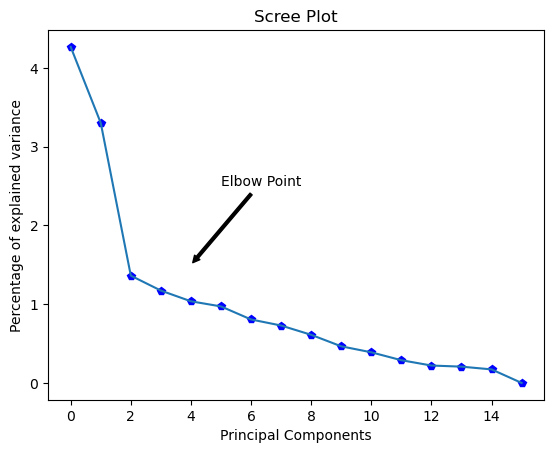

In [60]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(4,1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

In [61]:
eigenvector = eig_vec[:,0:5]

eigenvector

array([[-0.18184829,  0.37926559, -0.2704098 , -0.1654962 ,  0.09907338],
       [-0.1340447 ,  0.12055148, -0.44419913,  0.04280197, -0.58188326],
       [-0.44056748, -0.08780568,  0.13872867, -0.07078817,  0.00909054],
       [-0.38194728, -0.05398552,  0.26137501, -0.27656826, -0.09781228],
       [-0.33990545, -0.10847329, -0.15207599,  0.34068048,  0.20118862],
       [-0.05813965,  0.45215114,  0.16195931,  0.1700169 ,  0.10045795],
       [-0.29068546, -0.09029929,  0.11131851, -0.26453944, -0.44916402],
       [-0.21063941, -0.20609481, -0.30706777,  0.52312358,  0.00413542],
       [ 0.01040173,  0.46607561,  0.09571684,  0.20188594, -0.21419158],
       [-0.02470746,  0.4450253 ,  0.12513878,  0.26330381, -0.15076884],
       [-0.39059169, -0.11882916, -0.10539088,  0.14285167, -0.12730392],
       [-0.26666111,  0.17620365,  0.02906639, -0.20601063,  0.22910412],
       [-0.33343113,  0.1700043 ,  0.27701948,  0.003159  ,  0.23409272],
       [-0.09587362,  0.15543211, -0.4

In [62]:
# take the dot product of 'df_num_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns= ['PC1','PC2','PC3','PC4','PC5'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.666988,-0.883442,-0.108067,-0.557750,0.096755
1,0.290692,2.451839,0.563625,-0.130577,0.900337
2,-0.564359,-0.320593,-0.189231,-2.231461,-1.325616
3,0.542751,-0.133830,0.539257,-1.476585,0.717874
4,1.449597,-0.567726,-0.409119,-0.826584,-0.386955


In [63]:
# checking shape of new data
df_pca.shape

(8950, 5)

In [64]:
# specify required no of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=5, random_state=0)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [65]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.666988,-0.883442,0.108067,0.557750,0.096755
1,-0.290692,2.451839,-0.563625,0.130577,0.900337
2,0.564359,-0.320593,0.189231,2.231461,-1.325616
3,-0.542751,-0.133830,-0.539257,1.476585,0.717874
4,-1.449597,-0.567726,0.409119,0.826584,-0.386955
